In [46]:
import os
import numpy as np
import random 
from PIL import Image,ImageEnhance
# keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense,Flatten,Dropout
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import vgg16
from sklearn.utils import shuffle



Load dataset

In [47]:
train_dir=r"C:\Users\HP\Desktop\AI Doctor\Training"
test_dir=r"C:\Users\HP\Desktop\AI Doctor\Testing"
train_paths=[]
train_labels=[]
for label in os.listdir(train_dir):
 for image in os.listdir(os.path.join(train_dir,label)):
  train_paths.append(os.path.join(train_dir,label,image))
  train_labels.append(label)

train_paths,train_labels=shuffle(train_paths,train_labels)
train_paths

['C:\\Users\\HP\\Desktop\\AI Doctor\\Training\\pituitary\\Tr-pi_1098.jpg',
 'C:\\Users\\HP\\Desktop\\AI Doctor\\Training\\pituitary\\Tr-pi_0667.jpg',
 'C:\\Users\\HP\\Desktop\\AI Doctor\\Training\\notumor\\Tr-no_0550.jpg',
 'C:\\Users\\HP\\Desktop\\AI Doctor\\Training\\glioma\\Tr-gl_1307.jpg',
 'C:\\Users\\HP\\Desktop\\AI Doctor\\Training\\meningioma\\Tr-me_0462.jpg',
 'C:\\Users\\HP\\Desktop\\AI Doctor\\Training\\notumor\\Tr-no_1263.jpg',
 'C:\\Users\\HP\\Desktop\\AI Doctor\\Training\\notumor\\Tr-no_0918.jpg',
 'C:\\Users\\HP\\Desktop\\AI Doctor\\Training\\glioma\\Tr-gl_0405.jpg',
 'C:\\Users\\HP\\Desktop\\AI Doctor\\Training\\meningioma\\Tr-me_0928.jpg',
 'C:\\Users\\HP\\Desktop\\AI Doctor\\Training\\pituitary\\Tr-pi_0260.jpg',
 'C:\\Users\\HP\\Desktop\\AI Doctor\\Training\\notumor\\Tr-no_0917.jpg',
 'C:\\Users\\HP\\Desktop\\AI Doctor\\Training\\pituitary\\Tr-pi_0012.jpg',
 'C:\\Users\\HP\\Desktop\\AI Doctor\\Training\\notumor\\Tr-no_1236.jpg',
 'C:\\Users\\HP\\Desktop\\AI Doctor\\Tr

In [48]:

test_paths=[]
test_labels=[]
for label in os.listdir(test_dir):
 for image in os.listdir(os.path.join(test_dir,label)):
  test_paths.append(os.path.join(test_dir,label,image))
  test_labels.append(label)

test_paths,test_labels=shuffle(test_paths,test_labels)


In [49]:
import random 
import matplotlib.pyplot as plt
random_indices=random.sample(range(len(train_paths)),10)
random_indices

[2028, 4289, 163, 3464, 4216, 2203, 2884, 4097, 1016, 3515]

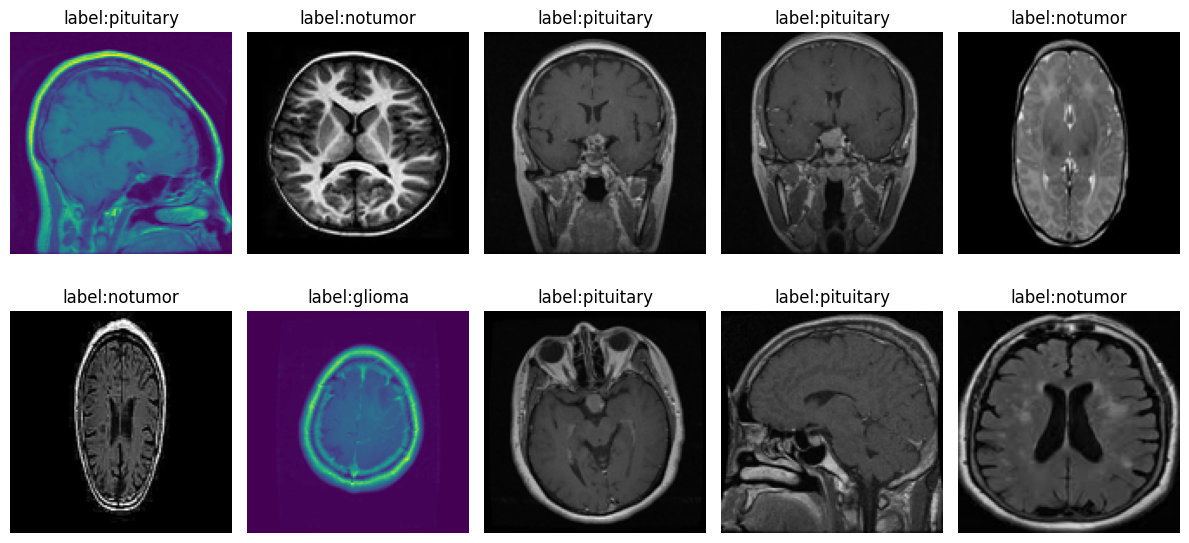

In [50]:
fig,axes=plt.subplots(2,5,figsize=(12,6))
axes=axes.ravel()
for i,idx in enumerate(random_indices):
    img_path=train_paths[idx]
    img=Image.open(img_path)
    img=img.resize((128,128))
    axes[i].imshow(img)
    axes[i].set_title(f"label:{train_labels[idx]}")
    axes[i].axis("off")
plt.tight_layout()
plt.show()




In [51]:
def augment_image(image):
    image=Image.fromarray(np.uint8(image))
    image=ImageEnhance.Brightness(image).enhance(random.uniform(0.8,1.2))
    image=ImageEnhance.Contrast(image).enhance(random.uniform(0.8,1.2))
    image=np.array(image)/255.0
    return image
def open_images(paths):
    images=[]
    for path in paths:
        img=load_img(path,target_size=(IMAGE_SIZE,IMAGE_SIZE))
        img=augment_image(img)
        images.append(img)
    return np.array(images)

def encode_label(labels):
    unique_labels=os.listdir(train_dir)
    encoded=[unique_labels.index(label) for label in unique_labels]
    return encoded
def datagen(paths,labels,batch_size=12,epochs=1):
    for _ in range(epochs):
        for i in range(0,len(paths),batch_size):
            batch_paths=paths[i:i+batch_size]
            batch_images=open_images(batch_paths)
            batch_labels=labels[i:i+batch_size]
            batch_labels=encode_label(batch_labels)
            yield batch_images,batch_labels



In [55]:
from tensorflow.keras.applications import VGG16
IMAGE_SIZE=128
base_model= VGG16(input_shape=(IMAGE_SIZE,IMAGE_SIZE,3), include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable=False


base_model.layers[-2].trainable=True
base_model.layers[-3].trainable=True
base_model.layers[-4].trainable=True

model=Sequential()
model.add(Input(shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

batch_size=20
steps=int(len(train_paths)/batch_size)
epochs=5

history=model.fit(
    datagen(train_paths,train_labels,batch_size=batch_size,epochs=epochs),
    epochs=epochs,
    steps_per_epoch=steps
    
)


Epoch 1/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 217s 752ms/step - loss: 0.6886 - sparse_categorical_accuracy: 0.7155
Epoch 2/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 241s 847ms/step - loss: 0.2661 - sparse_categorical_accuracy: 0.9011
Epoch 3/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 240s 842ms/step - loss: 0.1831 - sparse_categorical_accuracy: 0.9275
Epoch 4/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 235s 823ms/step - loss: 0.1427 - sparse_categorical_accuracy: 0.9488
Epoch 5/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 219s 768ms/step - loss: 0.0795 - sparse_categorical_accuracy: 0.9719


In [54]:
#chatgpt ka code hai
import os, random
import numpy as np
from PIL import Image, ImageEnhance
from tensorflow.keras.preprocessing.image import load_img, img_to_array

IMAGE_SIZE = 128
train_dir=r"C:\Users\HP\Desktop\AI Doctor\Training"

# ---- Image Augmentation ----
def augment_image(image):
    # Ensure numpy format
    if not isinstance(image, np.ndarray):
        image = img_to_array(image)
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8, 1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8, 1.2))
    image = np.array(image) / 255.0
    return image

# ---- Load & augment images ----
def open_images(paths):
    images = []
    for path in paths:
        img = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        img = augment_image(img)
        images.append(img)
    return np.array(images)

# ---- Encode labels ----
def encode_label(labels):
    unique_labels = sorted(os.listdir(train_dir))  # ensure consistent order
    encoded = [unique_labels.index(label) for label in labels]
    return encoded

# ---- Custom data generator ----
def datagen(paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):
        for i in range(0, len(paths), batch_size):
            batch_paths = paths[i:i+batch_size]
            batch_images = open_images(batch_paths)
            batch_labels = labels[i:i+batch_size]
            batch_labels = encode_label(batch_labels)
            yield batch_images, np.array(batch_labels)


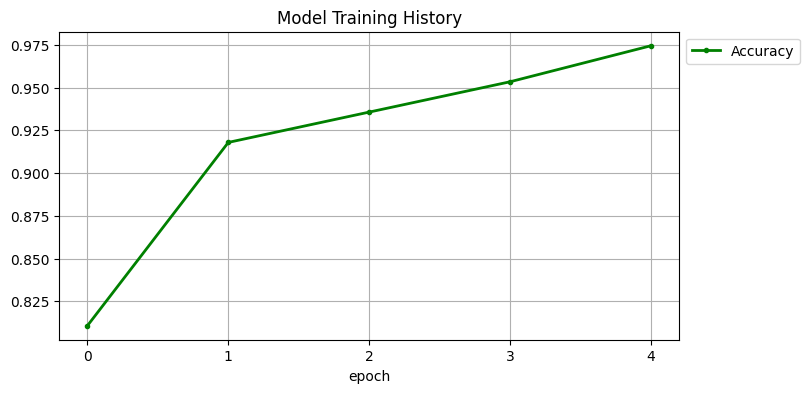

In [60]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['sparse_categorical_accuracy'],'.g-',linewidth=2)
plt.title("Model Training History")
plt.xlabel('epoch')
plt.xticks([x for x in range(epochs)])
plt.legend(['Accuracy','Loss'],loc='upper left',bbox_to_anchor=(1,1))
plt.show()


In [56]:
# ✅ Save the trained model
model.save("vgg16_model.h5")


In [63]:
#classification report
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
import numpy as np

test_images=open_images(test_paths)
test_labels_encoded=encoded_label(test_labels)
test_predictions=model.predict(test_images)
print("classification report")
print(classification_report(test_labels_encoded,np.argmax(test_predictions,axis=1)))

NameError: name 'encoded_label' is not defined

41/41 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step
Classification Report:
              precision    recall  f1-score   support

      glioma       0.98      0.84      0.90       300
  meningioma       0.87      0.91      0.89       306
     notumor       0.96      1.00      0.98       405
   pituitary       0.95      0.99      0.97       300

    accuracy                           0.94      1311
   macro avg       0.94      0.93      0.94      1311
weighted avg       0.94      0.94      0.94      1311



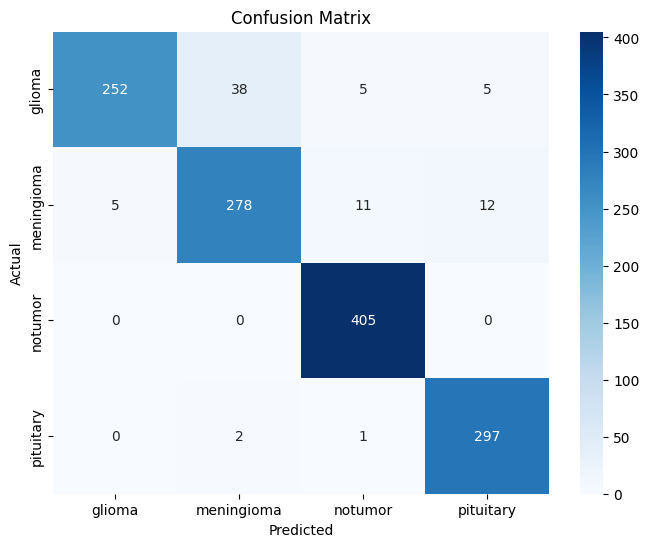

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Encode labels
le = LabelEncoder()
le.fit(test_labels)   # or fit on all labels (train+test)
test_labels_encoded = le.transform(test_labels)

# Predict on test data
test_images = open_images(test_paths)
test_predictions = model.predict(test_images)
y_pred = np.argmax(test_predictions, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(test_labels_encoded, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(test_labels_encoded, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [1]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("vgg16_model.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


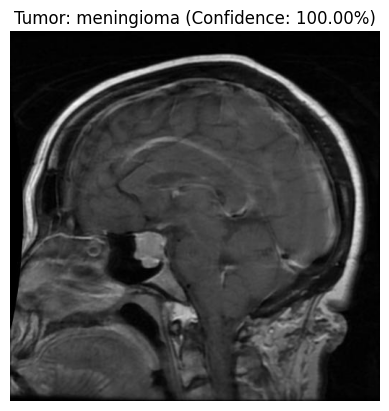

In [10]:
# chatgpt
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Define your class labels
class_labels = ['glioma','meningioma','notumor','pituitary']

def detect_and_display(image_path, model):
    try:
        # Load and preprocess image
        img = load_img(image_path, target_size=(128, 128))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0  # normalize if model trained on normalized data

        # Make prediction
        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions)
        confidence_score = np.max(predictions)

        # Determine class
        if class_labels[predicted_class_index] == 'notumor':
            result = "No Tumor Detected"
        else:
            result = f"Tumor: {class_labels[predicted_class_index]}"

        # Display the image and result
        plt.imshow(load_img(image_path))
        plt.axis('off')
        plt.title(f"{result} (Confidence: {confidence_score * 100:.2f}%)")
        plt.show()

    except Exception as e:
        print("Error processing image:", str(e))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


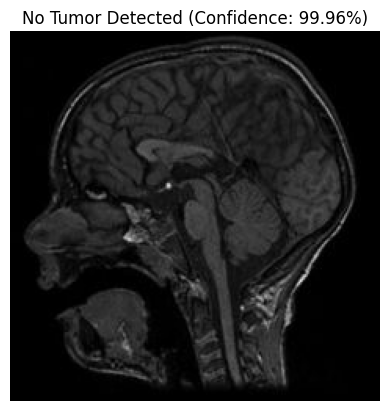

In [15]:
image_path=r"C:\Users\HP\Desktop\AI Doctor\Testing\notumor\Te-no_0038.jpg"
detect_and_display(image_path,model)